**HYBRID MODEL OF VAR-LSTM**

fatal: destination path 'XEWNet' already exists and is not an empty directory.
   Year  Week      Rain  Cases
0  1990    17  1.774286      4
1  1990    18  1.582857      5
2  1990    19  6.611429      4
3  1990    20  1.970000      3
4  1990    21  0.224286      6


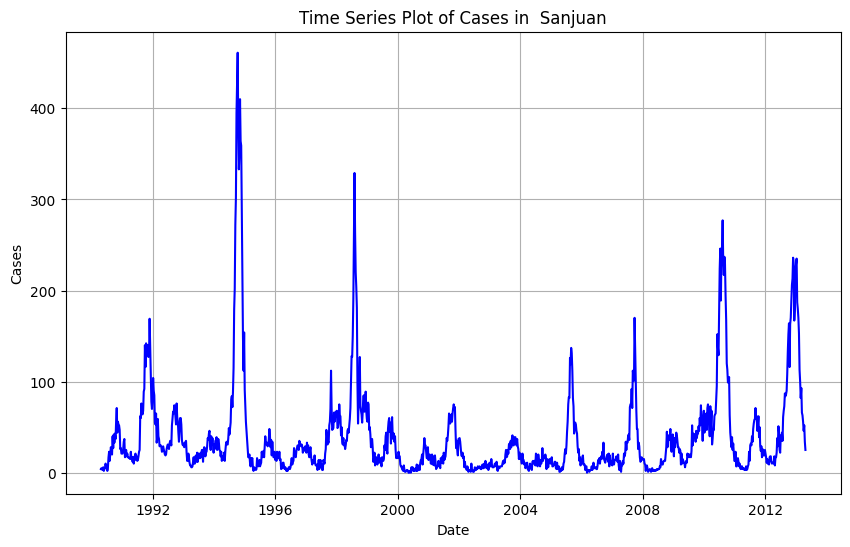

            Year  Week      Rain  Cases
Date                                   
1990-04-23  1990    17  1.774286      4
1990-04-30  1990    18  1.582857      5
1990-05-07  1990    19  6.611429      4
1990-05-14  1990    20  1.970000      3
1990-05-21  1990    21  0.224286      6
Lag Order: 2
            Cases  Week  varpredictions      week   weekcos   weeksin
Date                                                                 
1990-04-23      4    17       25.913711  0.966644  0.568065  0.822984
1990-04-30      5    18       25.692569  1.027059  0.517338  0.855781
1990-05-07      4    19       25.686763  1.087474  0.464723  0.885456
1990-05-14      3    20       26.459679  1.147890  0.410413  0.911900
1990-05-21      6    21       26.193343  1.208305  0.354605  0.935016
...           ...   ...             ...       ...       ...       ...
2013-03-25     56    12       26.060999  0.664568  0.787183  0.616719
2013-04-01     46    13       26.315492  0.724983  0.748511  0.663123
2013-04

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-12-d05ebc42d850>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['varpredictions'] = forecast_df['Cases']


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 720)               2088000   
                                                                 
 dense_14 (Dense)            (None, 32)                23072     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2111105 (8.05 MB)
Trainable params: 2111105 (8.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
10/10 [==============================] - 4s 165ms/step - loss: 7191.3315 - val_loss: 443.0832
Epoch 2/10
10/10 [==============================] - 1s 109ms/step - loss: 5828.9551 - val_loss: 304.8860
Epoch 3/10
10/10 [==============================] - 1s 100ms/step - lo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import mean_absolute_error
!git clone https://github.com/mad-stat/XEWNet

###For Sanjuan
Ahmedabad_data_set = pd.read_csv("/content/XEWNet/Dataset/Sanjuan_data_weekly.csv")
print(Ahmedabad_data_set.head())
Ahmedabad_data_set['Date'] = pd.to_datetime(Ahmedabad_data_set['Year'].astype(str) + Ahmedabad_data_set['Week'].astype(str) + '1', format='%Y%W%w')
Ahmedabad_data_set.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(Ahmedabad_data_set.index, Ahmedabad_data_set['Cases'], color='blue')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Time Series Plot of Cases in  Sanjuan')
plt.grid(True)
plt.show()
week = 52
print(Ahmedabad_data_set.head())
##defining errors
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def mase(test_data, forecast_data):
    mae = mean_absolute_error(test_data, forecast_data)
    naive_forecast = test_data[:-1]
    naive_mae = mean_absolute_error(naive_forecast, test_data[1:])

    # Calculate MASE
    mase = mae / naive_mae
    return mase
####Var modell
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.arima.model import ARIMA
data = Ahmedabad_data_set[['Cases','Rain']]
train_data = data.iloc[:-12]  # Use all but the last 12 rows for training
test_data = data.iloc[-12:]  # Use the last 12 rows for testing
model = VAR(train_data,exog=train_data[['Rain']])
model_fit = model.fit()
lag_order = model_fit.k_ar
print("Lag Order:", 2)
forecast_input = data.values[-3:]
forecast = model_fit.forecast(y=forecast_input, steps=len(data,),exog_future=data[['Rain']])
forecast_df = pd.DataFrame(forecast, index=data.index, columns=data.columns)
###### LSTM###########
data = Ahmedabad_data_set[['Cases','Week']]
data['varpredictions'] = forecast_df['Cases']
data['week'] = ((data['Week'] -1)  * np.pi / week)
data['weekcos'] = np.cos(data['week'])
data['weeksin'] = np.sin(data['week'])
print(data)
# print(data[['Week','week','weeksin','weekcos']].head(55))
data = data.drop('week',axis = 1)
data = data.drop('Week',axis = 1)

def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i + window_size]
        X.append(row)
        label = df_as_np[i + window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

x, y = df_to_X_y(data)
x_train, y_train = x[:300], y[:300]
x_eval, y_eval = x[300:400], y[300:400]
x_test, y_test = x[400:424], y[400:424]
x.shape,y.shape

from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(5, 4)))
model.add(LSTM(720))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
cp1 = ModelCheckpoint('model/', save_best_only=True)
# model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.summary()
model.fit(x_train,y_train,validation_data=(x_eval,y_eval), epochs= 10)

train_predictions = model.predict(x_test).flatten()
train_predictions = [int(x) for x in train_predictions]
print(train_predictions)
print(y_test)
print("Root mean sqaure",rmse(train_predictions,y_test))
print("Mean absolute",mae(train_predictions,y_test))
print("SMAPE",smape(train_predictions,y_test))
print('mase',mase(train_predictions,y_test))


**VAR MODEL**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error

###For Sanjuan
Ahmedabad_data_set = pd.read_csv("/content/XEWNet/Dataset/Sanjuan_data_weekly.csv")
print(Ahmedabad_data_set.head())
Ahmedabad_data_set['Date'] = pd.to_datetime(Ahmedabad_data_set['Year'].astype(str) + Ahmedabad_data_set['Week'].astype(str) + '1', format='%Y%W%w')
Ahmedabad_data_set.set_index('Date', inplace=True)

# Preprocess the data

# Split the data into train and test sets
train_data = Ahmedabad_data_set[:-12]
test_data = Ahmedabad_data_set[-12:]

# Fit the VAR model
var_model = VAR(train_data, exog=train_data[['Rain']])
var_model_fit = var_model.fit()

# Forecast using the VAR model
forecast_input = Ahmedabad_data_set[-3:]
forecast = var_model_fit.forecast(y=forecast_input.values, steps=len(test_data), exog_future=test_data[['Rain']].values)
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Get the forecasted cases
forecasted_cases = forecast_df['Cases']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Cases'], forecasted_cases))

# Calculate MAE
mae = mean_absolute_error(test_data['Cases'], forecasted_cases)

# Calculate SMAPE
smape = 2 * np.mean(np.abs(forecasted_cases - test_data['Cases']) / (np.abs(forecasted_cases) + np.abs(test_data['Cases'])))

# Calculate MASE
train_data_values = train_data['Cases'].values
test_data_values = test_data['Cases'].values
errors = np.abs(test_data_values - forecasted_cases.values)
scaling_factor = np.mean(np.abs(train_data_values[1:] - train_data_values[:-1]))
mase = np.mean(errors / scaling_factor)

print("RMSE:", rmse)
print("MAE:", mae)
print("SMAPE:", smape)
print("MASE:", mase)

   Year  Week      Rain  Cases
0  1990    17  1.774286      4
1  1990    18  1.582857      5
2  1990    19  6.611429      4
3  1990    20  1.970000      3
4  1990    21  0.224286      6
RMSE: 59.50560601097365
MAE: 48.376700989865476
SMAPE: 0.8501222719679756
MASE: 5.691093602924707


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**PROPHET MODEL**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import mean_absolute_error
!git clone https://github.com/mad-stat/XEWNet

###For Sanjuan
Ahmedabad_data_set = pd.read_csv("/content/XEWNet/Dataset/Sanjuan_data_weekly.csv")
print(Ahmedabad_data_set.head())
Ahmedabad_data_set['Date'] = pd.to_datetime(Ahmedabad_data_set['Year'].astype(str) + Ahmedabad_data_set['Week'].astype(str) + '1', format='%Y%W%w')
Ahmedabad_data_set.set_index('Date', inplace=True)
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from prophet import Prophet

# Load the data
data = Ahmedabad_data_set[['Cases','Rain']]

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Rain', 'Cases']])

# Split the data into training and testing sets
train_size = -24
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Separate the exogenous variables
train_exog = train_data[:, 0]  # Rain
test_exog = test_data[:, 0]  # Rain

# Prepare the data for Prophet
data = Ahmedabad_data_set[['Cases']]
data.reset_index(inplace=True)  # Reset the index to convert the date index to a column
data.columns = ['ds', 'y']  # Rename the columns to 'ds' and 'y' as required by Prophet

# Split the data into training and testing sets
train_data = data.iloc[:-24]  # Use all but the last 24 rows for training
test_data = data.iloc[-24:]  # Use the last 24 rows for testing

# Create a new Prophet model
model = Prophet(weekly_seasonality=True)

# Fit the model to the training data
model.fit(train_data)

# Make predictions for the future dates
future = model.make_future_dataframe(periods=len(data), freq='W')  # Set the frequency to weekly
forecast = model.predict(future)

# Extract the forecasted values
forecast_data = forecast[['ds', 'yhat']].tail(len(data))
forecast_data.columns = ['Date', 'forecast']

# Print the forecasted values
print(forecast_data)

# Evaluate the model
forecaster = pd.DataFrame([])
forecaster['Prophet'] = forecast_data['forecast']

# Calculate evaluation metrics
data = Ahmedabad_data_set[['Cases', 'Rain']]
data = data.reset_index(drop=True)
forecast_data = forecast_data.reset_index(drop=True)
print(len(data), len(forecast_data))
data['forecast'] = forecast_data['forecast']

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def mase(test_data, forecast_data):
    mae = mean_absolute_error(test_data, forecast_data)
    naive_forecast = test_data[:-1]
    naive_mae = mean_absolute_error(naive_forecast, test_data[1:])

    # Calculate MASE
    mase = mae / naive_mae
    return mase

print("Root mean square:", rmse(data['Cases'], data['forecast']))
print("Mean absolute:", mae(data['Cases'], data['forecast']))
print('mase:', mase(data['Cases'], data['forecast']))

fatal: destination path 'XEWNet' already exists and is not an empty directory.
   Year  Week      Rain  Cases
0  1990    17  1.774286      4
1  1990    18  1.582857      5
2  1990    19  6.611429      4
3  1990    20  1.970000      3
4  1990    21  0.224286      6


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0_uo20f/0c6o3jkn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0_uo20f/pzkg1ion.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78492', 'data', 'file=/tmp/tmpy0_uo20f/0c6o3jkn.json', 'init=/tmp/tmpy0_uo20f/pzkg1ion.json', 'output', 'file=/tmp/tmpy0_uo20f/prophet_modelu1y7hllt/prophet_model-20240530044541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:45:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:45:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           Date    forecast
1172 2012-11-04   51.131970
1173 2012-11-11   48.731750
1174 2012-11-18   46.406670
1175 2012-11-25   42.485679
1176 2012-12-02   36.413808
...         ...         ...
2363 2035-09-02  158.609447
2364 2035-09-09  161.042584
2365 2035-09-16  163.660562
2366 2035-09-23  165.909526
2367 2035-09-30  167.690048

[1196 rows x 2 columns]
1196 1196
Root mean square: 82.21709996521356
Mean absolute: 66.22508997636899
mase: 7.732191746141764


fatal: destination path 'XEWNet' already exists and is not an empty directory.
   Year  Week      Rain  Cases
0  1990    17  1.774286      4
1  1990    18  1.582857      5
2  1990    19  6.611429      4
3  1990    20  1.970000      3
4  1990    21  0.224286      6


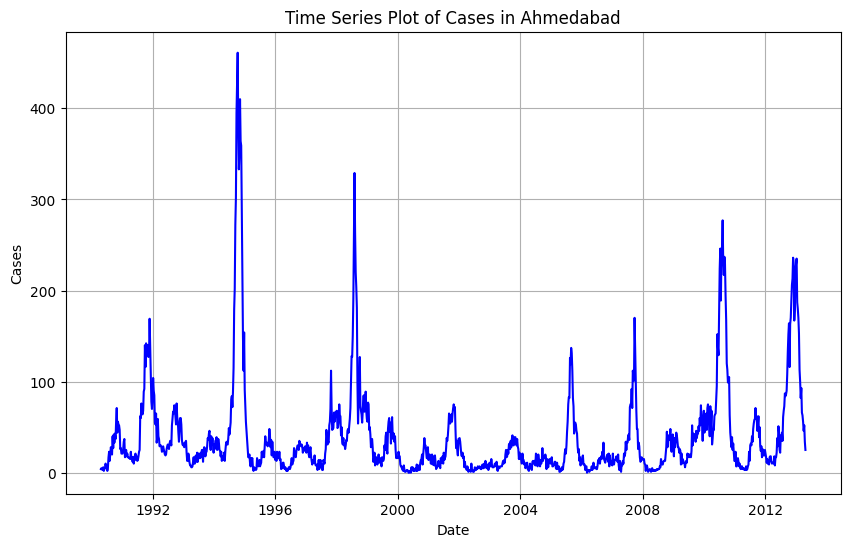

            Year  Week      Rain  Cases
Date                                   
1990-04-23  1990    17  1.774286      4
1990-04-30  1990    18  1.582857      5
1990-05-07  1990    19  6.611429      4
1990-05-14  1990    20  1.970000      3
1990-05-21  1990    21  0.224286      6


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0_uo20f/cydhn08x.json


(24, 1)
(24, 2)
    Forecasted Cases
0          19.136811
1          18.541569
2          18.028437
3          17.476173
4          16.943663
5          16.479567
6          15.983984
7          15.546157
8          15.107175
9          14.685697
10         14.281024
11         13.892486
12         13.519440
13         13.161267
14         12.817376
15         12.487197
16         12.140966
17         11.865808
18         11.573569
19         11.254543
20         11.015285
21         10.764927
22         10.513846
23         10.213828
        Arima
0   19.136811
1   18.541569
2   18.028437
3   17.476173
4   16.943663
5   16.479567
6   15.983984
7   15.546157
8   15.107175
9   14.685697
10  14.281024
11  13.892486
12  13.519440
13  13.161267
14  12.817376
15  12.487197
16  12.140966
17  11.865808
18  11.573569
19  11.254543
20  11.015285
21  10.764927
22  10.513846
23  10.213828


DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0_uo20f/b1tn1d0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10963', 'data', 'file=/tmp/tmpy0_uo20f/cydhn08x.json', 'init=/tmp/tmpy0_uo20f/b1tn1d0b.json', 'output', 'file=/tmp/tmpy0_uo20f/prophet_modelghr1ue8h/prophet_model-20240530045540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:55:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:55:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0_uo20f/eklut9hp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0_uo20f/mzev5qow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

           Date    forecast
1172 2012-11-04   51.131970
1173 2012-11-11   48.731750
1174 2012-11-18   46.406670
1175 2012-11-25   42.485679
1176 2012-12-02   36.413808
...         ...         ...
2363 2035-09-02  158.609447
2364 2035-09-09  161.042584
2365 2035-09-16  163.660562
2366 2035-09-23  165.909526
2367 2035-09-30  167.690048

[1196 rows x 2 columns]
             ds   y
0    1990-04-23   4
1    1990-04-30   5
2    1990-05-07   4
3    1990-05-14   3
4    1990-05-21   6
...         ...  ..
1191 2013-03-25  56
1192 2013-04-01  46
1193 2013-04-08  52
1194 2013-04-15  34
1195 2013-04-22  25

[1196 rows x 2 columns]
1196 1196
[[[  4.           1.77428571  51.13196958]
  [  5.           1.58285714  48.73174957]
  [  4.           6.61142857  46.40667046]
  [  3.           1.97        42.48567899]]

 [[  5.           1.58285714  48.73174957]
  [  4.           6.61142857  46.40667046]
  [  3.           1.97        42.48567899]
  [  6.           0.22428571  36.41380774]]

 [[  4.         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import mean_absolute_error
!git clone https://github.com/mad-stat/XEWNet

###For Sanjuan
Ahmedabad_data_set = pd.read_csv("/content/XEWNet/Dataset/Sanjuan_data_weekly.csv")
print(Ahmedabad_data_set.head())
Ahmedabad_data_set['Date'] = pd.to_datetime(Ahmedabad_data_set['Year'].astype(str) + Ahmedabad_data_set['Week'].astype(str) + '1', format='%Y%W%w')
Ahmedabad_data_set.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(Ahmedabad_data_set.index, Ahmedabad_data_set['Cases'], color='blue')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Time Series Plot of Cases in Ahmedabad')
plt.grid(True)
plt.show()
week = 52
print(Ahmedabad_data_set.head())
##defining errors
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

forecaster = pd.DataFrame([])
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def mase(test_data, forecast_data):
    mae = mean_absolute_error(test_data, forecast_data)
    naive_forecast = test_data[:-1]
    naive_mae = mean_absolute_error(naive_forecast, test_data[1:])

    # Calculate MASE
    mase = mae / naive_mae
    return mase
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data = Ahmedabad_data_set[['Cases','Rain']]

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Rain', 'Cases']])

# Split the data into training and testing sets
train_size = -24
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Separate the exogenous variables
train_exog = train_data[:, 0]  # Rain
test_exog = test_data[:, 0]  # Rain

# Fit the ARIMAX model
order = (1, 0, 1)  # (p, d, q)
model = ARIMA(endog=train_data[:, 1], exog=train_exog, order=order)
model_fit = model.fit()

# Make predictions on the testing data

predictions = model_fit.get_forecast(steps=len(test_data), exog=test_exog)
# Make predictions on the testing data
predictions = model_fit.get_forecast(steps=len(test_data), exog=test_exog)
predicted_cases = predictions.predicted_mean

# Reshape the predicted_cases array to 2D
predicted_cases = predicted_cases.reshape(-1, 1)
print(predicted_cases.shape)

# Create a temporary array of zeros with the same shape as predicted_cases
temp_array = np.zeros((predicted_cases.shape[0], 2))

# Fill the first column of temp_array with the predicted_cases values
temp_array[:, 0] = predicted_cases[:, 0]

# Inverse scale the predictions
predicted_cases = scaler.inverse_transform(temp_array)[:, 0]

# Inverse scale the actual values for comparison
# Inverse scale the actual values for comparison
print(test_data.shape)
# actual_cases = scaler.inverse_transform(test_data[:, 1])
actual_cases = scaler.inverse_transform(test_data)

# Calculate the root mean squared error (RMSE)
# rmse = np.sqrt(mean_squared_error(actual_cases, predicted_cases))
# print(f"RMSE: {rmse}")

# Print the forecasted values
forecast_data = pd.DataFrame(predicted_cases, columns=['Forecasted Cases'])
print(forecast_data)
forecaster['Arima'] = forecast_data['Forecasted Cases']
print(forecaster)
###PROPHET BY FACEBOOK
from prophet import Prophet

# Prepare the data
data = Ahmedabad_data_set[['Cases']]
data.reset_index(inplace=True)  # Reset the index to convert the date index to a column
data.columns = ['ds', 'y']  # Rename the columns to 'ds' and 'y' as required by Prophet

# Split the data into training and testing sets
train_data = data.iloc[:-24]  # Use all but the last 24 rows for training
test_data = data.iloc[-24:]  # Use the last 24 rows for testing

# Create a new Prophet model
model = Prophet( weekly_seasonality=True)

# Fit the model to the training data
model.fit(train_data)

# Make predictions for the future dates
future = model.make_future_dataframe(periods=len(test_data), freq='W')  # Set the frequency to weekly
forecast = model.predict(future)

# Extract the forecasted values
forecast_data = forecast[['ds', 'yhat']].tail(len(test_data))
forecast_data.columns = ['Date', 'forecast']
new_index = range(0,24)
forecast_data = forecast_data.set_index(pd.Index(new_index))
# Print the forecasted values

# forecaster['nbeats'] = np.array(predictions)
##YAHAN SE SHURU HORHA HYBRID MODELLLLfrom prophet import Prophet

# Prepare the data
data = Ahmedabad_data_set[['Cases']]
data.reset_index(inplace=True)  # Reset the index to convert the date index to a column
data.columns = ['ds', 'y']  # Rename the columns to 'ds' and 'y' as required by Prophet

# Split the data into training and testing sets
train_data = data.iloc[:-24]  # Use all but the last 24 rows for training
test_data = data.iloc[-24:]  # Use the last 24 rows for testing

# Create a new Prophet model
model = Prophet( weekly_seasonality=True)

# Fit the model to the training data
model.fit(train_data)

# Make predictions for the future dates
future = model.make_future_dataframe(periods=len(data), freq='W')  # Set the frequency to weekly
forecast = model.predict(future)

# Extract the forecasted values
forecast_data = forecast[['ds', 'yhat']].tail(len(data))
forecast_data.columns = ['Date', 'forecast']
# /new_index = range(0,/)/
# orecast_data = forecast_data.set_index(pd.Index(new_index))
# Print the forecasted values

print(forecast_data)
forecaster['Prophet'] = forecast_data['forecast']
print(data)
data = data = Ahmedabad_data_set[['Cases','Rain']]
data = data.reset_index(drop = True)
forecast_data = forecast_data.reset_index(drop = True)
print(len(data),len(forecast_data))
data['forecast'] = forecast_data['forecast']
data
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def create_sequences(df, sequence_length):
    xs = []
    ys = []
    for i in range(len(df) - sequence_length):
        x = df.iloc[i:(i + sequence_length)].values
        y = df.iloc[i + sequence_length]['Cases']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 4

# scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# Create sequences
X, y = create_sequences(data, sequence_length)
print(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
train_predictions = model.predict(X_test).flatten()
train_predictions = [int(x) for x in train_predictions]
print(train_predictions,y_test)
# print(len(train_predictions))
# print(len(y_test))
print("Root mean sqaure",rmse(train_predictions,y_test))
print("Mean absolute",mae(train_predictions,y_test))
print('mase',mase(train_predictions,y_test))